# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself
* "What are all possible labels?"
* "What is the range of values for the image data?"
* "Are the labels in order or random?"

Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


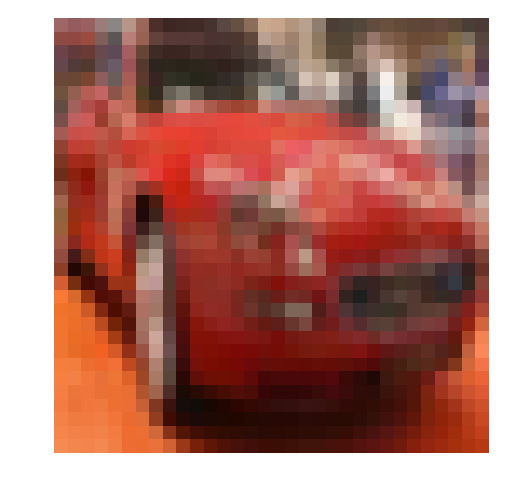

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    x_norm = x.reshape(x.size)
    
    x_max = max(x_norm)
    x_min = min(x_norm)
    x_range = x_max-x_min
    x_norm = (x_norm - x_min)/(x_range)    
    
    return x_norm.reshape(x.shape)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_initialized = False

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    global lb_initialized
    if(lb_initialized):
        pass
    else:    
        lb.fit(x)
        lb_initialized = True
    
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

-> I randomize the data on each epoch, so the batches are never equal.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('.\cifar-10-batches-py\preprocess_validation.p', mode='rb'))
print('Data Loaded')

Data Loaded


## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input( image_shape ):
    
    image_shape  = list( image_shape )
    image_shape.insert(0, None)
    x = tf.placeholder(tf.float32, image_shape, name = 'x')
    
    return x


def neural_net_label_input( n_classes ):

    y = tf.placeholder(tf.float32, [None, n_classes], name = 'y')
    
    return y
    
def neural_net_keep_prob_input():
    
    return tf.placeholder(tf.float32, name = 'keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """

    # Shape of the filter-weights for the convolution.
    input_channels = x_tensor.shape[3].value
    shape = [conv_ksize[0], conv_ksize[1], input_channels , conv_num_outputs]

    # Create new weights aka. filters with the given shape.
    weights = tf.Variable( tf.truncated_normal(shape, stddev = 0.05), name = 'weights' )

    # Create new biases, one for each filter.
    biases = tf.Variable( tf.constant(0.05, shape = [conv_num_outputs]), name = 'biases' )

    # Create the TensorFlow operation for convolution.
    layer = tf.nn.conv2d(input = x_tensor,
                         filter = weights,
                         strides = [1, conv_strides[0], conv_strides[1], 1],
                         padding = 'SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer = tf.nn.bias_add(layer, biases)
    
    # Rectified Linear Unit (ReLU).
    layer = tf.nn.relu(layer)
    
    # Pooling
    layer = tf.nn.max_pool(value = layer,
                           ksize = [1, pool_ksize[0], pool_ksize[1], 1],
                           strides = [1, pool_strides[0], pool_strides[1], 1],
                           padding = 'SAME')

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten( x_tensor ):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    
    # Get the shape of the input layer.
    layer_shape = x_tensor.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]
    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    layer_flat = tf.reshape(x_tensor, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs, non_linear_activation = True):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """

    # Create new weights and biases.
    num_inputs = x_tensor.shape[1].value
    weights = tf.Variable( tf.truncated_normal([num_inputs, num_outputs], stddev = 0.05), name = 'weights' )
    biases = tf.Variable( tf.constant(0.05, shape = [num_outputs]), name = 'biases' )
    
    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(x_tensor, weights) + biases
    
    # Non linear activation
    if non_linear_activation:
        layer = tf.nn.relu( layer )

    return layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # The layer is a fully connected one without the non-linear activation.
    return fully_conn(x_tensor, num_outputs, non_linear_activation = False)



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob, train_phase):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_1 =    conv2d_maxpool(x,       16,         [3,3],      [1,1],          [1,1],      [1,1])
    conv_1 =    tf.contrib.layers.batch_norm( conv_1, is_training = True)#train_phase)
    conv_2 =    conv2d_maxpool(conv_1,  32,         [3,3],      [1,1],          [2,2],      [2,2])
    conv_2 =    tf.contrib.layers.batch_norm( conv_2, is_training = True)#train_phase)
    conv_last = conv2d_maxpool(conv_2,  64,         [5,5],      [2,2],          [2,2],      [2,2])
    conv_last =    tf.contrib.layers.batch_norm( conv_last, is_training = True)#train_phase)
    # Apply a Flatten Layer
    x_flat = flatten( conv_last )

    # Apply 1, 2, or 3 Fully Connected Layers
    # Play around with different number of outputs
    full_1 =    fully_conn(x_flat, 256)
    full_1 =    tf.contrib.layers.batch_norm( full_1, is_training = True)#train_phase)
    full_1 =    tf.nn.dropout( full_1, keep_prob )
    full_2 =    fully_conn(full_1, 128)
    full_2 =    tf.contrib.layers.batch_norm( full_2, is_training = True)#train_phase)
    full_2 =    tf.nn.dropout( full_2, keep_prob )
    full_last = fully_conn( full_2, 64)
    full_last =    tf.contrib.layers.batch_norm( full_last, is_training = True)#train_phase)
    full_last = tf.nn.dropout( full_last, keep_prob )
    
    # Apply an Output Layer
    # Set this to the number of classes
    # TODO: 10 is hard coded... pass somehow
    output_layer = output( full_last, 10 )
    
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
train_phase = tf.placeholder(tf.bool, name='train_phase')

# Model
logits = conv_net(x, keep_prob, train_phase)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network_once(session, optimizer, keep_probability, feature_batch, label_batch, x, y, keep_prob, train_phase):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    
    dict_feed_train = { x: feature_batch, y: label_batch, keep_prob: keep_probability, train_phase: True }
    session.run(optimizer, feed_dict = dict_feed_train)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
* In order to allow to have train_neural_network_once in a different file, I neede to pass
  x, y and keep_prob explicitly. In the original code those came as globals.
"""
tests.test_train_nn(train_neural_network_once, x, y, keep_prob)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, batch_size, cost, accuracy, x, y, keep_prob, train_phase):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """

    # Get accuracy in batches for memory limitations. If batch_size is not big, like when checking
    # the training stats, the for loop below will run just once. But when the validation stats are
    # required the batch_size is big and must be checked in parts.
    test_batch_acc_total = 0
    test_batch_cost_total = 0
    test_batch_count = 0
    
    for feature_batch, label_batch in helper.batch_features_labels(feature_batch, label_batch, batch_size):
        feed_dict_fwd = {x: feature_batch, y: label_batch, keep_prob: 1.0, train_phase: False}
        test_batch_cost_total += session.run( cost,feed_dict = feed_dict_fwd)
        test_batch_acc_total += session.run( accuracy,feed_dict = feed_dict_fwd)
        test_batch_count += 1
    acc = test_batch_acc_total / test_batch_count
    cost = test_batch_cost_total / test_batch_count
        
    return 'Cost: {:05.4}, Acc: {:.1%}'.format(cost, acc)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
# Shown below, before calling the function that will train the network.

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
'''
I created a function to run the training on the selected number of batches, and with the option to 
load the a training stored from a file. 
'''

import time
from datetime import timedelta
def train_neural_network_full(optimizer, cost, accuracy, x, y, keep_prob,
                              keep_probability, 
                              n_batches, batch_size, shuffle_data, train_phase, 
                              valid_features, valid_labels,
                              epochs, load_data = False, file_path = './training_progress/saved_progress'):
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        # Initializing the variables
        if load_data:
            print('Continue a started training...')
            saver.restore(sess, file_path)
        else:
            print('Starting training...')
            sess.run(tf.global_variables_initializer())
        
        start_time = time.time()
        
        # Training cycle
        for epoch in range(epochs):
            
            for batch_i in range(1, n_batches + 1):
                start_time_batch = time.time()
                
                for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size, shuffle_data = True):
                    
                    train_neural_network_once(sess, optimizer, keep_probability, batch_features, batch_labels, x, y, keep_prob, train_phase)
                    
                end_time_batch = time.time()
                time_dif = str(timedelta(seconds = int(round(end_time_batch - start_time_batch))))
                aux_text = print_stats(sess, batch_features, batch_labels, batch_size, cost, accuracy, x, y, keep_prob, train_phase)                  
                print('Epoch {:>2}, time  {} sec, CIFAR-10 Batch {} - Training {}'.format(epoch + 1, time_dif, batch_i, aux_text))
                
            # Each epoch print validation cost and accuracy (more samples to run it, so I don´t do it each batch.)
            aux_text = print_stats(sess, valid_features, valid_labels, batch_size, cost, accuracy, x, y, keep_prob, train_phase)     
            print('Epoch {:>2} Finished - Validation {}'.format( epoch + 1, aux_text ))            
            
            
        # Print the time-usage.
        end_time = time.time()
        time_dif = end_time - start_time
        print("Time usage: " + str(timedelta(seconds = int(round(time_dif)))))
        
        save_path = saver.save(sess, file_path)

In [17]:
print('Checking the Training on a Single Batch...')
epochs = 10
batch_size = 64*4
keep_probability = 0.5

n_batches = 1
shuffle_data = True
                            
train_neural_network_full(optimizer, cost, accuracy, x, y, keep_prob,
                          keep_probability, 
                          n_batches, batch_size, shuffle_data, train_phase,
                          valid_features, valid_labels,
                          epochs)

Checking the Training on a Single Batch...
Starting training...
Epoch  1, time  0:00:05 sec, CIFAR-10 Batch 1 - Training Cost: 01.92, Acc: 30.0%
Epoch  1 Finished - Validation Cost: 1.816, Acc: 34.6%
Epoch  2, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 1.245, Acc: 62.5%
Epoch  2 Finished - Validation Cost: 01.59, Acc: 42.1%
Epoch  3, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 1.358, Acc: 50.0%
Epoch  3 Finished - Validation Cost: 1.451, Acc: 46.3%
Epoch  4, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 1.235, Acc: 57.5%
Epoch  4 Finished - Validation Cost: 1.369, Acc: 48.8%
Epoch  5, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 1.096, Acc: 60.0%
Epoch  5 Finished - Validation Cost: 1.277, Acc: 52.9%
Epoch  6, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 001.2, Acc: 57.5%
Epoch  6 Finished - Validation Cost: 1.237, Acc: 54.6%
Epoch  7, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 0.9026, Acc: 67.5%
Epoch  7 Finished - Validation Cost: 1

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [18]:
#%% Run in all the batches
save_model_path = './training_progress/saved_progress'
epochs = 10
batch_size = 64*4
keep_probability = 0.5
n_batches = 5
shuffle_data = True

train_neural_network_full(optimizer, cost, accuracy, x, y, keep_prob,
                          keep_probability, 
                          n_batches, batch_size, shuffle_data, train_phase,
                          valid_features, valid_labels,
                          epochs, load_data = False, file_path = save_model_path)


Starting training...
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 1 - Training Cost: 1.714, Acc: 35.0%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 2 - Training Cost: 1.429, Acc: 52.5%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 3 - Training Cost: 1.434, Acc: 55.0%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 4 - Training Cost: 1.288, Acc: 47.5%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 5 - Training Cost: 1.153, Acc: 52.5%
Epoch  1 Finished - Validation Cost: 001.3, Acc: 52.1%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 1 - Training Cost: 01.13, Acc: 55.0%
Epoch  2, time  0:00:03 sec, CIFAR-10 Batch 2 - Training Cost: 0.9526, Acc: 72.5%
Epoch  2, time  0:00:03 sec, CIFAR-10 Batch 3 - Training Cost: 1.233, Acc: 50.0%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 4 - Training Cost: 0.9995, Acc: 67.5%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 5 - Training Cost: 0.9817, Acc: 62.5%
Epoch  2 Finished - Validation Cost: 1.047, Acc: 62.2%
Epoch  3, time  0:00:04 sec, CIFAR-10 Batch 1 - Training

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./training_progress/saved_progress
Testing Accuracy: 74.5%



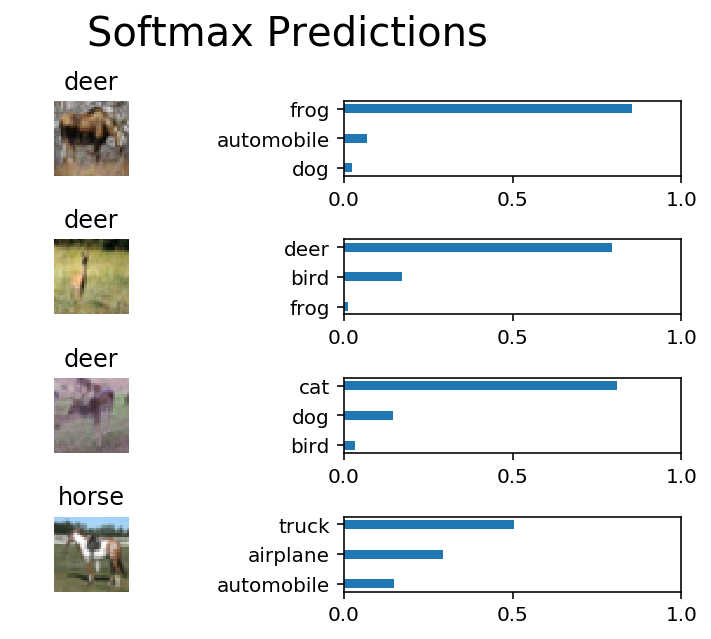

In [19]:
# I modified slightly the next lines so the test_model function remains defined 
# and can be easily reused if retraining is done.
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pickle
import random

def test_model(batch_size, save_model_path = './training_progress/saved_progress'):
    """
    Test the saved model against the test dataset
    """
    n_samples = 4
    top_n_predictions = 3
    
    test_features, test_labels = pickle.load(open('.\cifar-10-batches-py\preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        loaded_train_phase = loaded_graph.get_tensor_by_name('train_phase:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0, loaded_train_phase: False})
            test_batch_count += 1

        print('Testing Accuracy: {:.1%}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0, loaded_train_phase: False})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model( batch_size )

## Optional re-training
Using the stored model from the previous training continue to train and after check the result with the test_model function.

Continue a started training...
INFO:tensorflow:Restoring parameters from ./training_progress/saved_progress
Epoch  1, time  0:00:04 sec, CIFAR-10 Batch 1 - Training Cost: 0.2884, Acc: 95.0%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 2 - Training Cost: 0.2482, Acc: 95.0%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 3 - Training Cost: 0.3569, Acc: 90.0%
Epoch  1, time  0:00:03 sec, CIFAR-10 Batch 4 - Training Cost: 0.4078, Acc: 87.5%
Epoch  1, time  0:00:04 sec, CIFAR-10 Batch 5 - Training Cost: 0.6161, Acc: 80.0%
Epoch  1 Finished - Validation Cost: 0.7491, Acc: 75.6%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 1 - Training Cost: 0.3065, Acc: 90.0%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 2 - Training Cost: 0.3635, Acc: 87.5%
Epoch  2, time  0:00:03 sec, CIFAR-10 Batch 3 - Training Cost: 0.6179, Acc: 75.0%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 4 - Training Cost: 0.4442, Acc: 87.5%
Epoch  2, time  0:00:04 sec, CIFAR-10 Batch 5 - Training Cost: 0.3891, Acc: 85.0%
Epoch  2 Finishe

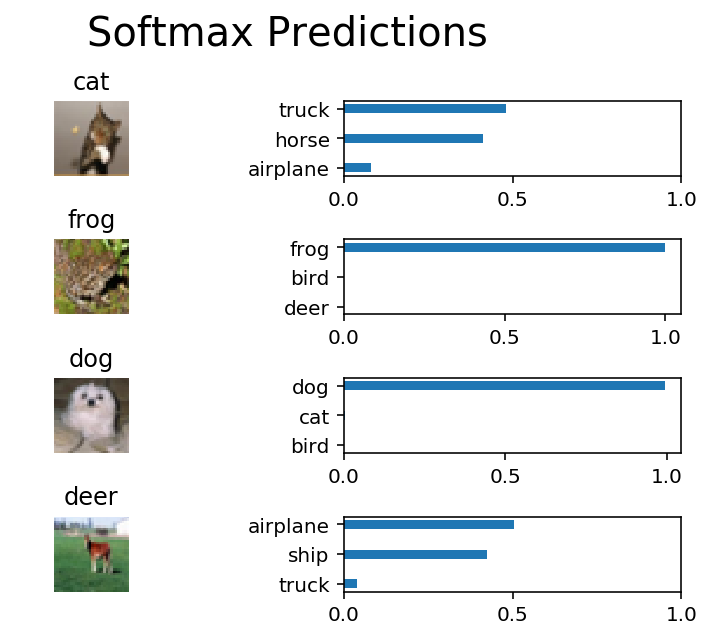

In [20]:
save_model_path = './training_progress/saved_progress'
epochs = 30
batch_size = 64*4
keep_probability = 0.5
n_batches = 5
shuffle_data = True

train_neural_network_full(optimizer, cost, accuracy, x, y, keep_prob,
                          keep_probability, 
                          n_batches, batch_size, shuffle_data, train_phase,
                          valid_features, valid_labels,
                          epochs, load_data = True, file_path = save_model_path)
    
test_model( batch_size )

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.